Tavis Cummings Model with modification of system via ising terms

Turning on a short pulse of coherent ising term drives photon count

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from qutip import *

In [2]:
    ##travis/cummings model (ising not part of Hamiltonian) (ising is an interaction term)
    data = pd.read_csv('tc24_converged.csv')

In [3]:
O = pd.pivot_table(data , index = ['bra'] , columns = ['Name','ket'],values = 'Element').replace(np.nan,0)

def q(z):
    return Qobj( z.values ) 

rag = range(1,25,1)
s = O['overlap'].loc[rag][rag]
boson = O['boson'].loc[rag][rag] ## unit coefficient
dicke = 4*O['dicke'].loc[rag][rag] ## unit coefficient 
external = O['external'].loc[rag][rag]# unit coefficent
ising = O['ising'].loc[rag][rag] 

##again, tehse below are NOT a part of the Hamiltonian.
z = [ O['z_{}'.format(di+1)].loc[rag][rag] for di in range(24) ] # z op
d = [ O['+spin_{}'.format(di+1)].transpose().loc[rag][rag] for di in range(24) ] #destruction op
a = O['+boson'].transpose().loc[rag][rag] #destruction op
#condition number#
print('condition number ',(lambda x : x[-1]/x[0]) (np.sort(np.linalg.eigvals(s))))


condition number  1.0084028237157376


In [4]:
    T      = 10*(2*np.pi) 
    N = 10001
    args = {}
    tlist  = np.linspace(0.0,T, N)

In [5]:
    #HAMILTONIAN
    #TRAVIS CUMMINGS MODEL
    h0 =boson + 0.25*dicke + external 

    H0 = q(h0)


    ##INTERACTION
    # TURN ON ISING TERM,
        ##nearest neighbors chat
    H1 = q(ising)

    ##OBSERVABLES
        #observe photon count
        #observe average z of spin block
    Obs = [q(boson), -1/24*np.sum([q(z[i]) for i in range(24)],axis=0)]

    #LINDBAD QUANTUM OBSERVATIONS
    #--actions on Hamiltonian--
    Ops = []


    ##start in Ground State
    ea,ev = linalg.eig(h0)
    ev = np.transpose(ev)
    Gs = Qobj( ev[np.argmin(ea)] )

Turn on the Ising term with this time signature

In [6]:
amp = -1
def drive(t,args):
        """
        Just a function to define a driving field
        """
        return amp*((1 if 10 < t and t < 15 else 0 )+(1 if 135 < t and t < 140 else 0 )+(1 if 180 < t and t < 185 else 0 ))#*np.sin(args['w'] * t)#(step(t)+ step(t-10)+step(t-100))*amp#



Photon cavity lights up under coherent ising term

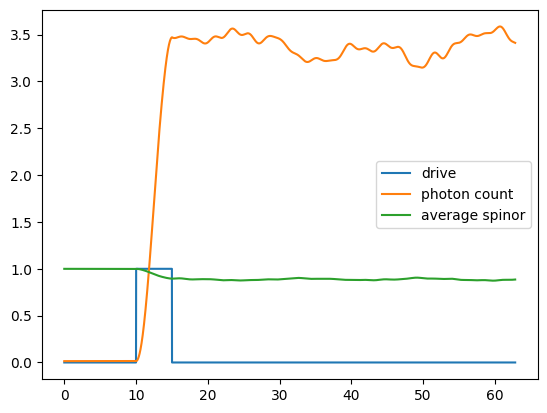

In [7]:
def simulate(tlist,amp,psi0,args):
    MM = len(rag)
    H = [H0, [H1, lambda t, args:  drive(t,args)]] 
    
    if False:
        # find the floquet modes for the time-dependent hamiltonian
        f_modes_0,f_energies = floquet_modes(H, T, args)

        # decompose the inital state in the floquet modes
        f_coeff = floquet_state_decomposition(f_modes_0, f_energies, psi0)

        # calculate the wavefunctions using the from the floquet modes
        p_ex = np.zeros(len(tlist))
        for n, t in enumerate(tlist):
            psi_t = floquet_wavefunction_t(f_modes_0, f_energies, f_coeff, t, H, T, args)
            p_ex[n] = expect(Obs, psi_t)

        plt.plot(tlist, p_ex)        
    else:
    # For reference: calculate the same thing with mesolve
        p_ex = mesolve(H, psi0, tlist, Ops, Obs, args).expect
    #p_ex = np.transpose(p_ex)
    return p_ex
plt.plot( tlist,list(map(lambda x : drive(x,args)/amp, tlist)), label = 'drive')
plt.plot(tlist,np.transpose(simulate(tlist,0,Gs,args)[0]), label = 'photon count')
plt.plot(tlist,np.transpose(simulate(tlist,0,Gs,args)[1]), label = 'average spinor')
plt.legend()

#photon number (not observed or emitted)

Averge polarization of spinors decreases as photon lights up
, normalized the drive for plotting sake